In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

In [2]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step 


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train[200]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 197,
        255,  84,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  85, 251,
        253,  83,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

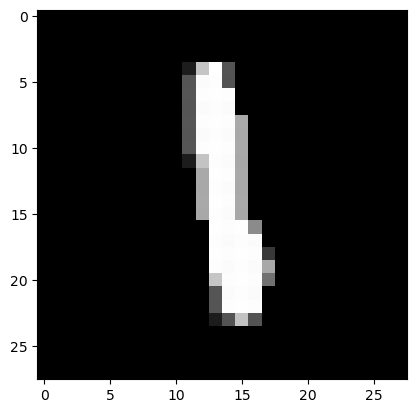

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[200], cmap = 'grey')

In [17]:
y_train[200]

np.uint8(1)

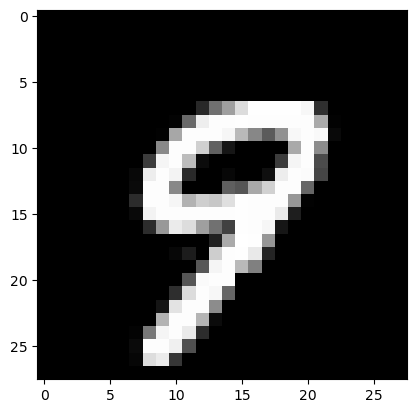

In [18]:
plt.imshow(x_train[2453], cmap='grey')

In [19]:
y_train[2453]

np.uint8(9)

In [20]:
img = np.array([[0.78,0.34], [0.20,0.80]])
img

array([[0.78, 0.34],
       [0.2 , 0.8 ]])

In [21]:
img.shape

(2, 2)

In [23]:
img.flatten()

array([0.78, 0.34, 0.2 , 0.8 ])

In [25]:
x_train[200].shape

(28, 28)

In [26]:
x_train[200].flatten().shape

(784,)

In [27]:
#reshaping
arr = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

In [28]:
arr

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [29]:
arr.shape

(4, 3)

In [30]:
arr.reshape(2,6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [31]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [32]:
x_train.shape

(60000, 784)

In [33]:
x_train[200];

In [34]:
x_train = x_train/255
x_test = x_test/255

In [35]:
set(y_train)

{np.uint8(0),
 np.uint8(1),
 np.uint8(2),
 np.uint8(3),
 np.uint8(4),
 np.uint8(5),
 np.uint8(6),
 np.uint8(7),
 np.uint8(8),
 np.uint8(9)}

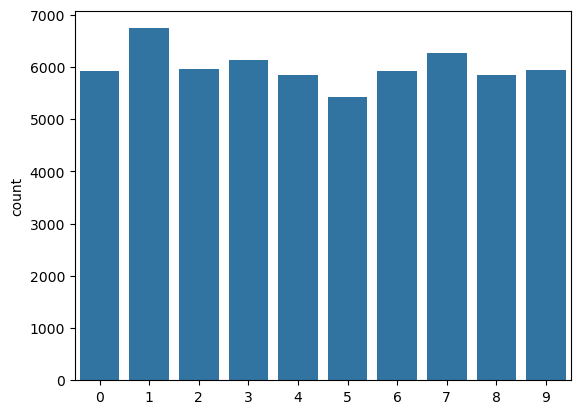

In [38]:
import seaborn as sns
sns.countplot(x= y_train);

In [39]:
from keras.utils import to_categorical

In [40]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [59]:
model = Sequential()
model.add(Dense(784, activation= 'relu', input_shape= (784,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [60]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 784)            │       615,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 818,970 (3.12 MB)

 Trainable params: 818,970 (3.12 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# compile the model
model.compile(loss = 'categorical_crossentropy', metrics =
['accuracy'], optimizer = SGD(learning_rate= 0.001, momentum = 0.7))

In [52]:
# train the model
history =model.fit(x_train, y_train_cat, epochs = 10, batch_size = 10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 85s 13ms/step - accuracy: 0.1119 - loss: 2.2986 
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 82s 14ms/step - accuracy: 0.2794 - loss: 1.9519 
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 140s 13ms/step - accuracy: 0.5554 - loss: 1.0910
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 82s 13ms/step - accuracy: 0.7812 - loss: 0.6610 
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 80s 13ms/step - accuracy: 0.9050 - loss: 0.3613 
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 79s 13ms/step - accuracy: 0.9459 - loss: 0.2256 
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 81s 13ms/step - accuracy: 0.9631 - loss: 0.1545 
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 82s 13ms/step - accuracy: 0.9738 - loss: 0.1103 
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 82s 13ms/step - accuracy: 0.9808 - loss: 0.0787 
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 82s 13ms/step - accuracy: 0.9858 - loss: 0.0576 


In [53]:
history.history

{'accuracy': [0.11190000176429749,
  0.279449999332428,
  0.555400013923645,
  0.7812333106994629,
  0.9050333499908447,
  0.9458500146865845,
  0.9631166458129883,
  0.9738166928291321,
  0.980816662311554,
  0.9857666492462158],
 'loss': [2.298643112182617,
  1.9518831968307495,
  1.0910066366195679,
  0.6610218286514282,
  0.36133190989494324,
  0.22558040916919708,
  0.1545180231332779,
  0.11033052206039429,
  0.07869740575551987,
  0.05759868398308754]}

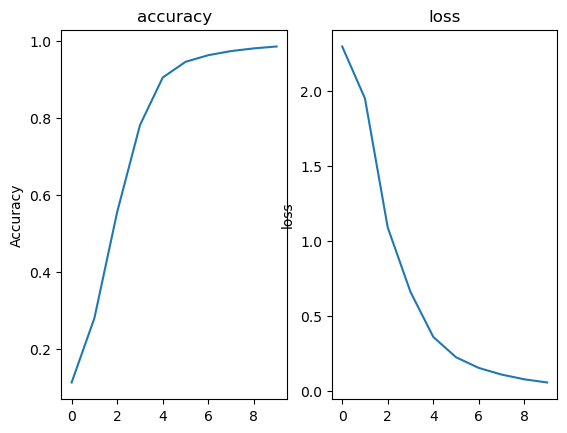

In [58]:
plt.subplot(1,2,1)
plt.title('accuracy')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy']);

plt.subplot(1,2,2)
plt.title('loss')
plt.ylabel('loss')
plt.plot(history.history['loss']);

In [56]:
model.evaluate(x_test, y_test_cat, batch_size = 1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 72s 7ms/step - accuracy: 0.9648 - loss: 0.1646 


[0.1645706444978714, 0.9648000001907349]